#**ML Assignment 3 – Linear Regression**

Mobile Price Prediction using Linear Regression
Mobile prices are influenced by various factors such as the amount of RAM, the quality of the camera, battery power, screen resolution (PPI) and other hardware specifications. Your goal is to analyze these factors, build a Linear Regression model, and use it to make accurate predictions of mobile phone prices based on the dataset provided.

***Dataset Link:***
https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/mobile_price.csv


**Machine Learning Model Building Steps:-**

**1.Explore the Dataset:**

**1.1 Understand the Data:** Begin by getting an overview of the dataset. Check the type and amount of data available, and understand the structure of the dataset.


In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/mobile_price.csv')
df.head(10) # Show first 10 rows

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


In [3]:
df.tail(10) # Show last 10 rows

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
151,851,3055,2173,158.0,5.50,401,4,1.875,64.0,6.0,16.0,8.0,3000,7.4
152,290,4361,3248,238.0,5.70,515,8,1.950,128.0,6.0,12.0,8.0,7000,7.4
153,290,4361,3291,238.0,5.70,515,8,1.950,128.0,6.0,12.0,8.0,7000,7.4
154,1131,2536,3619,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4
155,1206,3551,4408,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [4]:
df.shape # Show number of rows and columns

(161, 14)

In [5]:
df.columns # Display the column names.

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

#**Data Preprocessing**

In [6]:
# Rename columns
df = df.rename(columns={
    'Product_id': 'Product_ID',
    'cpu core': 'CPU_Core',
    'cpu freq': 'CPU_Freq',
    'internal mem': 'Internal_Mem',
    'RearCam': 'Rear_Cam'
})

# Capitalze and Upper case columns
df = df.rename(columns=lambda x: x.capitalize() if x in ['weight', 'resoloution', 'battery', 'thickness']
               else (x.upper() if x in ['ram', 'ppi'] else x))

df.columns # Display the column names.

Index(['Product_ID', 'Price', 'Sale', 'Weight', 'Resoloution', 'PPI',
       'CPU_Core', 'CPU_Freq', 'Internal_Mem', 'RAM', 'Rear_Cam', 'Front_Cam',
       'Battery', 'Thickness'],
      dtype='object')

In [7]:
df.info() # Show data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_ID    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   Weight        161 non-null    float64
 4   Resoloution   161 non-null    float64
 5   PPI           161 non-null    int64  
 6   CPU_Core      161 non-null    int64  
 7   CPU_Freq      161 non-null    float64
 8   Internal_Mem  161 non-null    float64
 9   RAM           161 non-null    float64
 10  Rear_Cam      161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  Battery       161 non-null    int64  
 13  Thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [8]:
df.isnull().sum() # Check for missing values in each column.

,0
Product_ID,0
Price,0
Sale,0
Weight,0
Resoloution,0
PPI,0
CPU_Core,0
CPU_Freq,0
Internal_Mem,0
RAM,0


In [9]:
df.dtypes # Display the data types of each column.

,0
Product_ID,int64
Price,int64
Sale,int64
Weight,float64
Resoloution,float64
PPI,int64
CPU_Core,int64
CPU_Freq,float64
Internal_Mem,float64
RAM,float64


**1.2 Examine Statistical Summary:** Look at basic statistics of the dataset to understand the distribution of features.

In [10]:
df.describe() # Generate descriptive statistics of the DataFrame.

,Product_ID,Price,Sale,Weight,Resoloution,PPI,CPU_Core,CPU_Freq,Internal_Mem,RAM,Rear_Cam,Front_Cam,Battery,Thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


<Axes: >

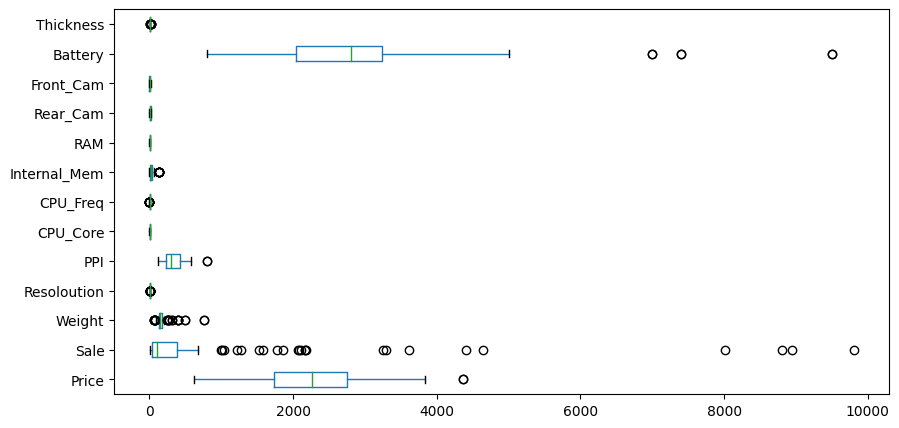

In [11]:
#df.boxplot(df.columns.tolist(), vert=False, figsize=(10, 5), grid=False)

# Except "Product_ID" remaining I need
df.drop('Product_ID', axis=1).boxplot(vert=False, grid=False, figsize=(10, 5))

#**Analyze boxplots for potential outliers and data distribution insights**


**1. RAM:**  
- If the RAM boxplot shows a large number of outliers on the higher end, it suggests some high-end phones with significantly more RAM than the average, potentially impacting pricing.  
- A long whisker on the lower end may point to phones with lower RAM, influencing their lower price points.

**2. Battery Power:**
- A wide interquartile range (IQR) for battery power could indicate substantial variability in battery capacities across the phones.
- Outliers might represent phones with exceptionally large or small batteries, which could affect their respective price ranges.

**3. PPI:**
- If the PPI boxplot displays a relatively small IQR with few outliers, it might imply that most phones have similar screen resolutions, suggesting less influence on the pricing.
- However, outliers could hint at phones with either extremely high or low PPI values, affecting their prices.


**4. Price Range:**
Examine the price range boxplot carefully for outliers. High-priced outliers may represent premium or flagship phones, while low-priced outliers could be budget models.  The overall distribution will show you the typical price range and dispersion.

**General Considerations:**

**Outliers:**

Investigate the nature of outliers – are they valid data points or errors?  Consider whether outliers should be removed or handled differently in model.

**Skewness:**
- Observe the skewness of each feature's distribution.
- Highly skewed distributions may need transformations (e.g., square root transformation, log transformation) before modeling.

**Variability:**
- Note the variability (IQR) of each feature.
-Features with high variability might have a stronger impact on the target variable (price).

**1.3 Correlation Analysis:** Create a heatmap to visualize the correlation matrix. Focus on the relationship between the features and the target variable ***Price***.


<Axes: >

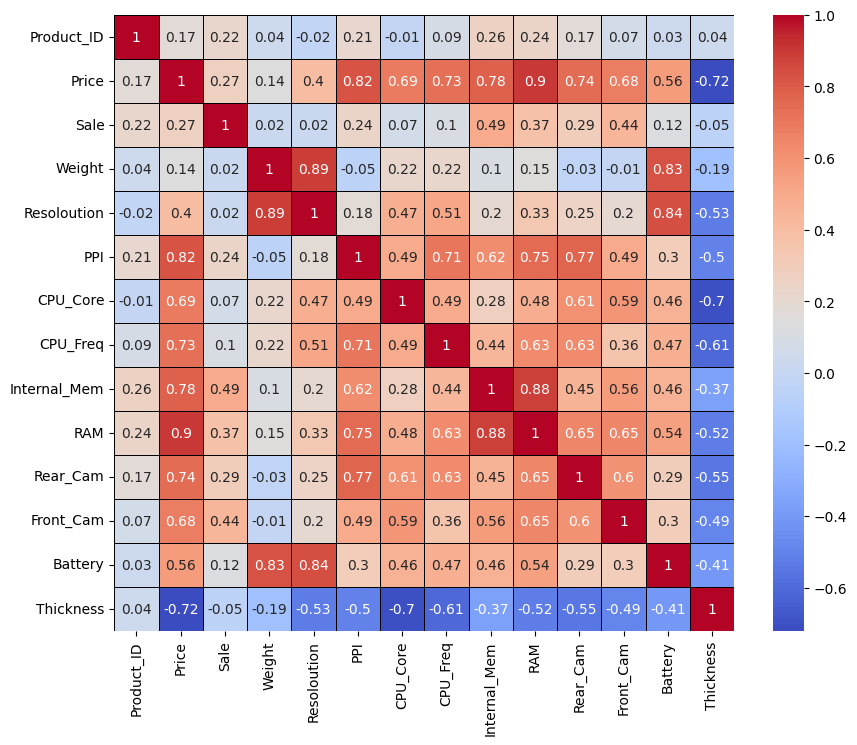

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5, linecolor= 'black') # Create a heatmap to visualize the correlation matrix

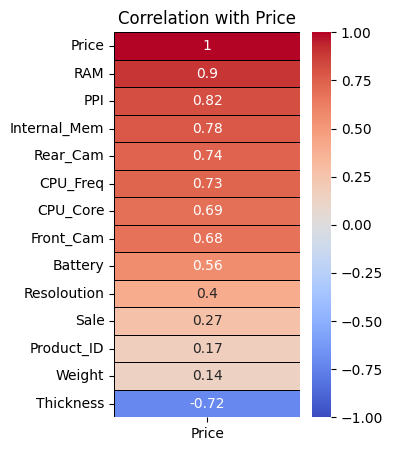

In [13]:
# 1.3 Correlation Analysis (Focus on 'Price')
plt.figure(figsize=(3, 5))
sns.heatmap(df.corr()[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5, linecolor= 'black',  vmin=-1, vmax=1)
plt.title('Correlation with Price')
plt.show()

# **Correlation Matrix Insights:**

**1. Positive one -** Super High Positive Relationship.

**2. Negative one -** Super Strong Negative Relationship.

**3. Zero or Near to Zero or close to Zero -** No Relationship or Worst Relationship or Weak Relationship.

***Based on the heatmap of correlations with 'Price', we can identify features that have a strong positive or negative relationship with the mobile phone price.***

**Strong Positive Correlations:**

- Features with a high positive correlation with 'Price' indicate that as the value of these features increases, the price of the phone tends to increase as well.  

- For example, a high correlation between RAM and Price suggests that phones with more RAM are generally more expensive.  

- Identify the specific features and their correlation coefficients from the heatmap.

**Strong Negative Correlations:**

- Features with a strong negative correlation suggest an inverse relationship.  

- As the value of these features increases, the price tends to decrease, and vice versa.  

- Carefully examine these features to understand why they might have a negative correlation with price (e.g., perhaps older phones have lower prices).

**Weak Correlations**:

- Features with correlations close to zero suggest a weak relationship with price.

- These features might have little predictive power for pricing.

**Further Analysis:**

The correlation matrix provides initial insights into relationships between features and the target variable. Further analysis could include:

**1. Statistical Significance:** Check if the correlations are statistically significant.  Correlation coefficients alone don't tell the whole story; you need to consider the p-values associated with them.

**2. Scatter Plots:** Visualize the relationships between highly correlated features and 'Price' using scatter plots to confirm the trends and identify any non-linear relationships.

**3. Feature Engineering:** Investigate creating new features from existing ones, as combinations of features might show stronger correlations with the target variable.

**4. Outlier Investigation:**  See if any outliers in the highly correlated features may be distorting the results.

**Example:**

- ***RAM*** has a strong positive correlation with ***Price*** as expected.

- Phones with more RAM are often more expensive.

- However, the strength of this correlation needs further validation.

- We'd want to examine the scatter plot between RAM and Price to confirm this trend and look for outliers that could influence the correlation.

***In summary:*** '

Use the correlation matrix as a starting point for feature selection and further analysis, always validating the relationships visually and statistically.

**1.4 Relationship Analysis:** Identify the top 4 features that show the highest correlation with the target variable ***Price***. For each of these features, plot a scatter plot to observe how well each feature correlates with ***Price***. Display all four scatter plots side by side in a single figure.

Top 4 features correlated with 'Price': ['RAM', 'PPI', 'Internal_Mem', 'Rear_Cam'] 



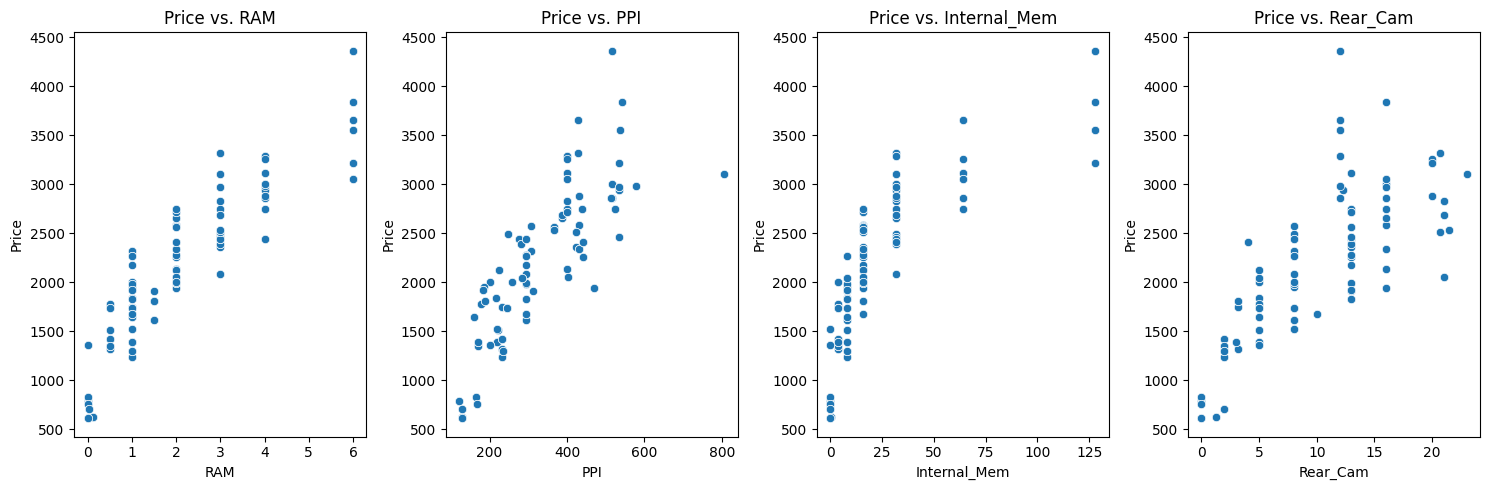

In [14]:
# Identify top 4 features correlated with 'Price'
top_4_features = df.corr()['Price'].abs().sort_values(ascending=False)[1:5].index.tolist()

#print(f"Top 4 features correlated with 'Price': {', '.join(top_4_features)}")
print(f"Top 4 features correlated with 'Price': {top_4_features}", '\n')

# Create scatter plots for the top 4 features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(top_4_features):
    plt.subplot(1, 4, i + 1) #subplot(nrows=1, ncols=4, index, **kwargs)
    #plt.subplot(2, 2, i + 1,)
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f'Price vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

Top 4 features correlated with 'Price': ['RAM', 'PPI', 'Internal_Mem', 'Rear_Cam']



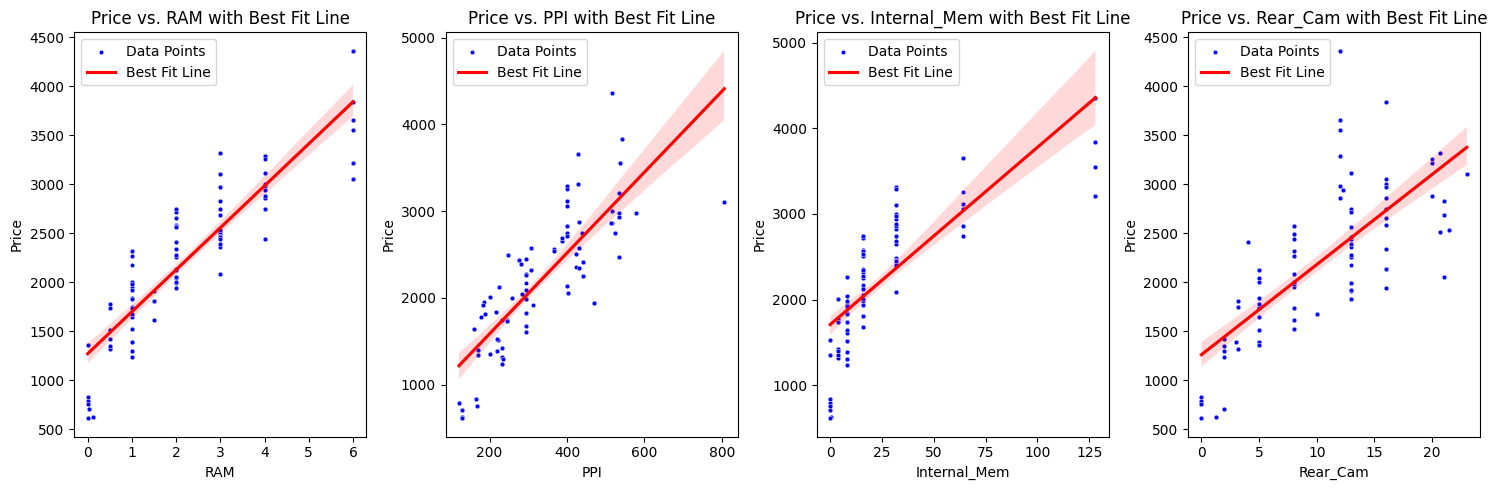

In [15]:
#Scatter Plots with Best-Fit Line for Top 4 Features Correlated with 'Price'

# Identify top 4 features correlated with 'Price'
top_4_features = df.corr()['Price'].abs().sort_values(ascending=False)[1:5].index.tolist()
print(f"Top 4 features correlated with 'Price': {top_4_features}\n")

# Create scatter plots with a best-fit line for the top 4 features
plt.figure(figsize=(15, 5))  # Set the figure size to 15x5 inches

for i, feature in enumerate(top_4_features):
    plt.subplot(1, 4, i + 1)  # Create subplots in a 1x4 grid

    # Plot scatter points
    sns.scatterplot(
        x=df[feature],  # X-axis data
        y=df['Price'],  # Y-axis data
        color='blue',  # Color of the scatter points
        s=10,  # Size of the scatter points
        label='Data Points'  # Label for the legend
    )

    # Plot best-fit line
    sns.regplot(
        x=df[feature],  # X-axis data
        y=df['Price'],  # Y-axis data
        scatter=False,  # Do not plot scatter points again
        color='red',  # Color of the best-fit line
        label='Best Fit Line'  # Label for the legend
    )

    plt.title(f'Price vs. {feature} with Best Fit Line')  # Title for the subplot
    plt.xlabel(feature)  # X-axis label
    plt.ylabel('Price')  # Y-axis label
    plt.legend(loc='upper left')  # Position the legend in the top-left corner

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()  # Display the plots


***Professional insights of top 4 features, how well each feature correlates with Price (example - adapt based on your actual plots):***

**1. RAM:**
 - A strong positive correlation is likely visible.  

 - Higher RAM usually corresponds to higher prices, indicating its significance in determining a phone's value.

**2. PPI:**
- A moderate positive correlation might be observed.

- Higher PPI generallyimplies better screen quality, justifying a price premium.

- However, the relationship might not be as linear as with RAM.

- Look for clusters or non-linear patterns.

**3. Internal Memory:**  
- A positive correlation is expected, with more storage
commanding higher prices.  

- The strength of this correlation should be compared to RAM and PPI.

**4. RearCam:**  
- The relationship here is less predictable.

- Higher megapixels don't always translate to higher prices due to factors like image quality and camera features.  Look for patterns
  - is there a threshold?
  - Are there specific price points associated with camera resolutions?

***Overall:***  
- The scatter plots visually represent how these features influence price.

- Analyze the strength and nature of these correlations to
understand which features are the most important predictors and whether any transformations (e.g. log transformation or squar root transformation for skewed distributions) are needed.

-------------------------------------------------------------
## **Multiple Linear Regression**

Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. It extends simple linear regression to handle multiple predictors.

### **Equation of the Model**

The equation of the best fit hyperplane in MLR is given by:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_k x_k
$$

Where:
- $ y $ : Dependent variable (outcome), which is the predicted value
- $ x_1, x_2, \ldots, x_k $ : Independent variables (predictors)
- $ \beta_0 $ : y-intercept of the regression plane
- $ \beta_1, \beta_2, \ldots, \beta_k $ : Regression coefficients for each independent variable

### **Ordinary Least Squares (OLS) Method**

The Ordinary Least Squares (OLS) method estimates the coefficients of the MLR model by minimizing the sum of the squared differences between the observed values and the predicted values.

#### **OLS Method Formulas**

- **Coefficients ($ \beta_j $)**:
  $$
  \text{Minimize} \; \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$

  Where $ \hat{y}_i $ is the predicted value for observation $ i $.

- **Intercept ($ \beta_0 $)**:
  $$
  \beta_0 = \bar{y} - \sum_{j=1}^k \beta_j \bar{x_j}
  $$

  Where:
  - $ \bar{y} $ is the mean of $ y $
  - $ \bar{x_j} $ is the mean of each independent variable $ x_j $

The OLS method finds the best fit hyperplane that minimizes the squared errors between the observed values and the predicted values.

#**2. Prepare the Data:**
**2.1 Feature Selection:** Select the features and the target variable for your analysis.

In [16]:
# Define features variable (X) and target variable (y)

#X = df.columns.tolist()[2:] # Exclude 'Product_ID' and 'Price' remaining taken as my Features variable
X = df.drop(['Product_ID', 'Price'], axis=1) # Exclude 'Product_ID' and 'Price' remaining taken as my Features variable

Y = df['Price']  # Target variable

**2.2 Split the Dataset:** Divide the dataset into training and testing sets. Use 80% of the data for training and 20% for testing.

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # 80% of the data for training and 20% (0.20) for testing

#**3. Build and Train the Model:**
**3.1 Create a Linear Regression Model:** Build a linear regression model using the training data.


In [18]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model

# Instantiate Class
lrmodel = LinearRegression()

**3.2 Train the Model:** Fit the model to the training data.

In [19]:
# Fit the model to the training data
lrmodel.fit(X_train, y_train)

LinearRegression()

#**4. Evaluate the Model:**

**4.1 Predict:** Use the model to make predictions on the test set.


In [20]:
# the model to make predictions on the test set.
Y_pred = lrmodel.predict(X_test)
Y_pred

array([ 893.75907282, 1868.5261444 , 2595.273983  , 1527.97628045,
       1615.64255159, 1862.75165186,  893.98028183, 1342.96388449,
       2362.5607319 , 2594.27854247, 1393.43557484, 1607.17469733,
       1754.8240151 , 2876.29583915, 2238.78374   , 2210.52346782,
       2506.56872475, 3033.69374294, 1455.27151367, 2210.68937457,
       2334.78687095, 1754.78714693, 1928.85696227, 2429.0148865 ,
       3098.36639807, 4130.67689626, 2445.76777928, 3415.84610436,
       2664.80082744, 2514.98954494, 3082.71730111, 2567.53914668,
       2579.88761098])

##**4.2 Metrics Calculation:** ***Evaluate the model’s performance using the following metrics:***

**4.2.a Slope (Coefficient) and Intercept:** Print the slope (coefficient) and intercept of the regression line.



In [21]:
#  The slope (coefficient) of the regression line
slope = lrmodel.coef_
print(f"Slope (Coefficient): {slope}", '\n')

# The intercept of the regression line
intercept = lrmodel.intercept_
print(f"Intercept: {intercept}")

Slope (Coefficient): [-1.84340840e-02 -5.71234073e-01 -6.20319868e+01  1.10946826e+00
  5.01616044e+01  1.32497966e+02  5.61384517e+00  1.01662722e+02
  3.70502751e+00  7.18737795e+00  1.23652718e-01 -6.95683429e+01] 

Intercept: 1667.775652409168


**4.2.b Model Performance Metrics:** ***Calculate and report the following metrics:***

**4.2.b_1) R² Score:** How well does the model explain the variance in the target variable?

**4.2.b_2) Mean Absolute Error (MAE):** What is the average absolute difference between predicted and actual values?

**4.2.b_3)Mean Squared Error (MSE):** What is the average of the squared differences between predicted and actual values?



### **Quick Guide on Typical Ranges and Interpretations for Machine Learning Error Metrics**

#### **1. R² Score (Coefficient of Determination)**
- **Range: R² ∈ (−∞,1]**
- **Interpretation**: Measures how well the model explains the variance in the target variable.
  - **1**: Perfect fit (model explains all variability in data).
  - **0**: The model does no better than a horizontal line (mean of target values).
  - **Negative Values**: Model performs worse than a horizontal line. This can happen if the model is poorly fitted or if there's extreme overfitting.

#### **2. Mean Absolute Error (MAE)**
- **Range: MAE ∈ [0,+∞)**
- **Interpretation**: Measures the average magnitude of errors without considering their direction.
  - **Lower MAE**: Better fit (smaller errors).
  - **Higher MAE**: Worse fit (larger errors).
- **Unit**: Same as the target variable.

#### **3. Mean Squared Error (MSE)**
- **Range: MSE ∈ [0,+∞)**
- **Interpretation**: Measures the average squared difference between predicted and actual values, penalizing larger errors more than smaller ones.
  - **Lower MSE**: Better fit.
  - **Higher MSE**: Worse fit.
- **Unit**: Square of the target variable’s unit, which makes it less interpretable.

#### **4. Root Mean Squared Error (RMSE)**
- **Range: RMSE ∈ [0,+∞)**
- **Interpretation**: Square root of MSE, providing a measure of error in the same units as the target variable.
  - **Lower RMSE**: Better fit.
  - **Higher RMSE**: Worse fit.
- **Unit**: Same as the target variable, making it more interpretable than MSE.

**Summary**:
- When comparing models, lower values of MAE, MSE, and RMSE and higher values of R² typically indicate better model performance.
- However, the absolute "goodness" of these scores depends on the context and scale of the data.


In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared, MAE, MSE, and RMSE
r2 = r2_score(y_test, Y_pred)
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = (mean_squared_error(y_test, Y_pred)**0.5)

print(f"R-squared: {r2} which is {round(r2*100)}%\n")
print(f"Mean Absolute Error (MAE): {mae}\n")
print(f"Mean Squared Error (MSE): {mse}\n")
print(f"Root Mean Squared Error (RMSE): {rmse}\n")

# Professional insights on R-squared and error metrics
print("\nModel Performance Analysis:")
print("----------------------------")

# R² Score:
print(f"\n1) R-squared: {r2}\n")

if r2 > 0.7:  # greater than 70%
    print("* The model explains a substantial portion of the variance in the target variable."
          "\n* This suggests a relatively good fit.")
elif r2 > 0.5 and r2 <= 0.7:  # between 50% and 70%
    print("* The model explains a moderate portion of the variance."
          "\n* Further improvements may be possible.")
else:
    print("* The model explains a small portion of the variance, indicating a poor fit."
          "\n* Consider feature engineering, different model types, or more data.")

print("\n*************************")

# Mean Absolute Error (MAE):
print(f"\n2) Mean Absolute Error (MAE): {mae}\n")

if mae < 100:  # Example threshold adjusted based on data scale
    print("The average absolute prediction error is relatively low.")
elif mae < 200 and mae >= 100:  # Example threshold adjusted based on data scale
    print("The average absolute prediction error is moderate.")
else:
    print("The average absolute prediction error is high.")

print("\n*************************")

# Mean Squared Error (MSE):
print(f"\n3) Mean Squared Error (MSE): {mse}\n")

if mse < 10000:  # Example threshold adjusted based on data scale
    print("The average squared error is relatively low.")
elif mse < 40000 and mse >= 10000:  # Example threshold adjusted based on data scale
    print("The average squared error is moderate.")
else:
    print("The average squared error is high.")

print("\n*************************")

# Root Mean Squared Error (RMSE):
print(f"\n4) Root Mean Squared Error (RMSE): {rmse}\n")

if rmse < 100:  # Example threshold adjusted based on data scale
    print("The root mean squared error is relatively low.")
elif rmse < 200 and rmse >= 100:  # Example threshold adjusted based on data scale
    print("The root mean squared error is moderate.")
else:
    print("The root mean squared error is high.")


R-squared: 0.9614025134850815 which is 96%

Mean Absolute Error (MAE): 123.46453332516217

Mean Squared Error (MSE): 21880.49170257642

Root Mean Squared Error (RMSE): 147.92055875562536


Model Performance Analysis:
----------------------------

1) R-squared: 0.9614025134850815

* The model explains a substantial portion of the variance in the target variable.
* This suggests a relatively good fit.

*************************

2) Mean Absolute Error (MAE): 123.46453332516217

The average absolute prediction error is moderate.

*************************

3) Mean Squared Error (MSE): 21880.49170257642

The average squared error is moderate.

*************************

4) Root Mean Squared Error (RMSE): 147.92055875562536

The root mean squared error is moderate.


### **Quick Guide on Interpreting of This Model Performance Metrics**

#### **R² Score (Coefficient of Determination):**

- **Definition**: Measures the proportion of the variance in the target variable explained by the model.
- **Range**: −∞ to
1
  - **1**: Perfect fit (model explains all variability).
  - **0**: Model performs like the mean of target values (no explanation of variability).
  - **Negative**: Model performs worse than a horizontal line.
- **Thresholds**:
  - **> 0.7**: Good fit (explains most variance).
  - **0.5 - 0.7**: Moderate fit.
  - **< 0.5**: Poor fit (consider refining the model).

---

#### **Mean Absolute Error (MAE):**

- **Definition**: Average absolute error between predicted and actual values, providing a straightforward error magnitude.
- **Range**: [0,+∞)
- **Thresholds** (example, dependent on data scale):
  - **Low MAE**: < 100
  - **Moderate MAE**: 100 - 200
  - **High MAE**: > 200

---

#### **Mean Squared Error (MSE):**

- **Definition**: Average squared error, heavily penalizing larger errors.
- **Range**: [0,+∞)
- **Thresholds** (example, dependent on data scale):
  - **Low MSE**: < 10,000
  - **Moderate MSE**: 10,000 - 40,000
  - **High MSE**: > 40,000

---

#### **Root Mean Squared Error (RMSE):**

- **Definition**: Square root of MSE, providing an error measure in the same units as the target.
- **Range**: [0,+∞)
- **Thresholds** (example, dependent on data scale):
  - **Low RMSE**: < 100
  - **Moderate RMSE**: 100 - 200
  - **High RMSE**: > 200

---
**Summary:**
- For each metric, lower values indicate a better fit (for MAE, MSE, RMSE), while a higher R² score indicates a model that explains more variance in the data.

- Adjust these thresholds depending on your data’s actual range and error tolerance.


#**5. Conclude the Analysis:**

**5.1 Model Evaluation:** Based on the performance metrics, assess how well the model predicts mobile prices. Discuss whether the model’s performance is satisfactory or if there are areas for improvement.


In [23]:
# Model Evaluation and Conclusion

print("\nOverall Model Assessment:")
print("-------------------------")

# Combine insights from R-squared and error metrics
if r2 > 0.7 and rmse < 100:  # Example thresholds, adjust based on your data
    print("\n* The model demonstrates strong predictive performance for mobile prices.")
    print("\n* The R-squared value indicates a good fit, and the RMSE suggests relatively low prediction errors.")
    print("\n*This model might be satisfactory for many applications.")
elif r2 > 0.5 and rmse < 200:
    print("\n* The model shows moderate predictive performance for mobile prices.")
    print("\n* While the fit is reasonable, there's room for improvement.")
    print("\n* Consider exploring feature engineering, different model types, or more data.")
else:
    print("\n* The model's predictive performance is weak for mobile prices.")
    print("\n* The R-squared is low, and the error metrics suggest significant prediction errors.")
    print("\n* Substantial improvements are needed. Explore feature engineering, more data, regularization, different model types, handling outliers.")

# Additional Considerations:
print("\nFurther Considerations:")
print("----------------------")

# 1. Business context:
print("\n1. Business Context:\n")
print("   - How critical are prediction errors?  A small error might be acceptable in some applications but not others.")
print("   - What is the cost of false positives or false negatives?")

# 2. Feature engineering:
print("\n2. Feature Engineering:\n")
print("   - Investigate creating interaction terms or polynomial features to capture non-linear relationships.")
print("   - Consider domain-specific features (e.g., brand reputation, camera quality).")

# 3. Outlier handling:
print("\n3. Outlier Handling:\n")
print("   - Examine outliers in the data to determine if they should be removed, transformed, or handled differently.")

# 4. Model selection:
print("\n4. Model Selection:\n")
print("   - Explore other regression models (e.g., Random Forest, Gradient Boosting) that might capture non-linearity better.")

# 5. Data quality:
print("\n5. Data Quality:\n")
print("   - Ensure data is accurate and consistent. Check for missing values or incorrect data entries.")

# 6. Cross-validation:
print("\n6. Cross-Validation:\n")
print("   - Use techniques like k-fold cross-validation for more robust model evaluation.")


Overall Model Assessment:
-------------------------

* The model shows moderate predictive performance for mobile prices.

* While the fit is reasonable, there's room for improvement.

* Consider exploring feature engineering, different model types, or more data.

Further Considerations:
----------------------

1. Business Context:

   - How critical are prediction errors?  A small error might be acceptable in some applications but not others.
   - What is the cost of false positives or false negatives?

2. Feature Engineering:

   - Investigate creating interaction terms or polynomial features to capture non-linear relationships.
   - Consider domain-specific features (e.g., brand reputation, camera quality).

3. Outlier Handling:

   - Examine outliers in the data to determine if they should be removed, transformed, or handled differently.

4. Model Selection:

   - Explore other regression models (e.g., Random Forest, Gradient Boosting) that might capture non-linearity better.

5. 

**5.2 Insights and Discussion:**

5.2.a) What insights did you gain from the correlation analysis and scatter plots?


**Insights from Correlation Analysis and Scatter Plots:**
---------------------------------------------------

1. **RAM:**
   - Strong positive correlation with Price observed.
   - Higher RAM values generally correspond to higher prices.

---

2. **PPI:**
   - Moderate positive correlation observed, but potentially non-linear.
   - Higher PPI might indicate a price premium for screen quality, but the relationship may not be strictly linear.

---

3. **Internal_Mem:**
   - Positive correlation with Price observed, but less strong than RAM.
   - Increased storage tends to correlate with higher price.

---

4. **Rear_Cam:**
   - Correlation with Price is less predictable and possibly complex.
   - Megapixels alone might not be the sole indicator; image quality and features could play a crucial role.
   - Possible non-linear relationship or threshold effects warrant further investigation.

---

**Overall:**
- RAM and potentially PPI show the strongest linear influence on price, suggesting they are important predictors.
- Internal Memory is positively correlated with price but less strongly.
- RearCam's influence appears less direct and might be non-linear, requiring further analysis.
- Scatter plots helped reveal the nature and strength of these relationships, highlighting potential non-linear patterns or thresholds to consider.


5.2.b) How do the selected features contribute to the prediction of mobile prices?



1. **RAM:**
   - Strong positive correlation with price.
   - Higher RAM generally commands higher prices, reflecting its importance in performance and value.

---

2. **PPI:**
   - Moderate positive correlation, potentially non-linear.
   - Better screen quality (higher PPI) often justifies a price premium.
   - The relationship might not be strictly linear; further analysis (e.g., clustering) could be beneficial.

---

3. **Internal_Mem:**
   - Positive correlation with price.
   - More storage capacity tends to increase the phone's price.
   - The strength of this relationship needs comparison with other features like RAM and PPI.

---

4. **Rear Camera (Rear_Cam):**
   - Less predictable relationship with price.
   - Higher megapixels do not always translate to higher prices.
   - Other factors such as image quality, features, and brand influence pricing.
   - Look for non-linear patterns, threshold effects, or specific price points related to camera resolution.

---

**Overall:**
- RAM and PPI appear to be the most significant linear predictors of price.
- Internal memory contributes positively but might be less influential than RAM or PPI.
- The relationship between rear camera specifications and price is complex and requires further investigation.
- Non-linear relationships or interactions between features might exist.


5.2.c) What do the slope (coefficient) and intercept reveal about the relationship between the features and the target variable?

### **In the Context of Multiple Linear Regression**

---

#### **Slope (Coefficient):**

- For each independent variable (feature), the corresponding slope (coefficient) represents the change in the target variable (price) for a one-unit increase in that feature, holding all other features constant.

- A positive slope indicates that an increase in the feature leads to an increase in the price. For example, a positive coefficient for RAM suggests that phones with more RAM tend to be more expensive.

- A negative slope means an increase in the feature leads to a decrease in the price (less common but possible).

- The magnitude of the slope indicates the strength of the relationship; larger absolute values mean a stronger influence on price.

---

#### **Intercept:**

- The intercept represents the predicted value of the target variable (price) when all independent variables are zero. In many real-world situations, an intercept of zero might not have practical meaning. For example, a phone with 0 RAM and 0 storage does not exist.

- The intercept establishes the baseline value of the target variable before considering the influence of the features.


5.2.d) How well does the model perform based on the evaluation metrics? Are there any discrepancies between the predicted and actual values?


Mean Absolute Percentage Error (MAPE): 5.88%

Discrepancies between Actual and Predicted Prices:

     Actual    Predicted  Difference
105     833   893.759073  -60.759073
108    1676  1868.526144 -192.526144
142    2508  2595.273983  -87.273983
55     1777  1527.976280  249.023720
94     1511  1615.642552 -104.642552
29     1950  1862.751652   87.248348
101     833   893.980282  -60.980282
51     1347  1342.963884    4.036116
100    2343  2362.560732  -19.560732
143    2508  2594.278542  -86.278542


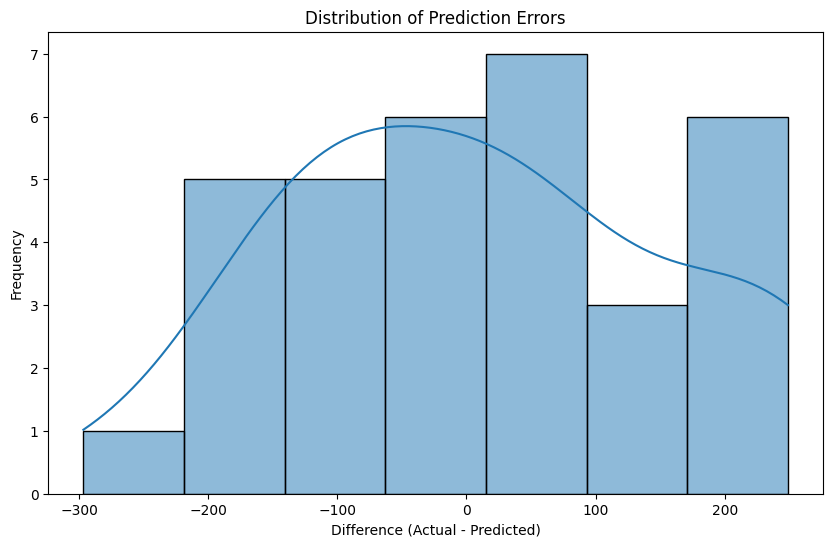

In [50]:
# Analyze discrepancies between predicted and actual values
discrepancies = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
discrepancies['Difference'] = discrepancies['Actual'] - discrepancies['Predicted']

# Calculate the mean absolute percentage error (MAPE)
mape = (abs(discrepancies['Difference']) / discrepancies['Actual']).mean() * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print("\nDiscrepancies between Actual and Predicted Prices:\n")
print(discrepancies.head(10))


# Examine the distribution of the differences
plt.figure(figsize=(10, 6))
sns.histplot(discrepancies['Difference'], kde=True)
plt.xlabel('Difference (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()


In [51]:
# Analyze Model Performance and Discrepancies

# Professional insights on R-squared and error metrics
print("\nModel Performance Analysis:")
print("----------------------------")

# R² Score:
print(f"\n1) R-squared: {r2}\n")

if r2 > 0.7:  # greater than 70%
    print("* The model explains a substantial portion of the variance in the target variable."
          "\n* This suggests a relatively good fit.")
elif r2 > 0.5 and r2 <= 0.7:  # between 50% and 70%
    print("* The model explains a moderate portion of the variance."
          "\n* Further improvements may be possible.")
else:
    print("* The model explains a small portion of the variance, indicating a poor fit."
          "\n* Consider feature engineering, different model types, or more data.")

print("\n*************************")

# Mean Absolute Error (MAE):
print(f"\n2) Mean Absolute Error (MAE): {mae}\n")

if mae < 100:  # Example threshold adjusted based on data scale
    print("The average absolute prediction error is relatively low.")
elif mae < 200 and mae >= 100:  # Example threshold adjusted based on data scale
    print("The average absolute prediction error is moderate.")
else:
    print("The average absolute prediction error is high.")

print("\n*************************")

# Mean Squared Error (MSE):
print(f"\n3) Mean Squared Error (MSE): {mse}\n")

if mse < 10000:  # Example threshold adjusted based on data scale
    print("The average squared error is relatively low.")
elif mse < 40000 and mse >= 10000:  # Example threshold adjusted based on data scale
    print("The average squared error is moderate.")
else:
    print("The average squared error is high.")

print("\n*************************")

# Root Mean Squared Error (RMSE):
print(f"\n4) Root Mean Squared Error (RMSE): {rmse}\n")

if rmse < 100:  # Example threshold adjusted based on data scale
    print("The root mean squared error is relatively low.")
elif rmse < 200 and rmse >= 100:  # Example threshold adjusted based on data scale
    print("The root mean squared error is moderate.")
else:
    print("The root mean squared error is high.")



Model Performance Analysis:
----------------------------

1) R-squared: 0.9614025134850815

* The model explains a substantial portion of the variance in the target variable.
* This suggests a relatively good fit.

*************************

2) Mean Absolute Error (MAE): 123.46453332516217

The average absolute prediction error is moderate.

*************************

3) Mean Squared Error (MSE): 21880.49170257642

The average squared error is moderate.

*************************

4) Root Mean Squared Error (RMSE): 147.92055875562536

The root mean squared error is moderate.


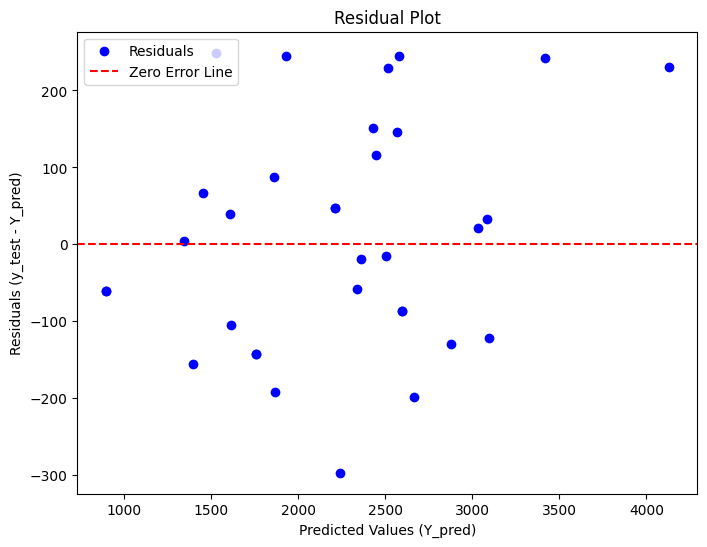

In [54]:
# Calculate residuals
residuals = y_test - Y_pred

# Residual Plots: Scatter plot of predicted values vs. residuals to find patterns.
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, label='Residuals', color='blue')  # Scatter plot with a label
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')  # Add a horizontal line at 0

# Add labels and title
plt.title("Residual Plot")
plt.xlabel("Predicted Values (Y_pred)")
plt.ylabel("Residuals (y_test - Y_pred)")

# Add a legend to the plot in the top-left corner
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [42]:
# Check for patterns in the residual plots.
# Non-random patterns (e.g., curves) suggest potential model misspecification.

# 3. Analyze Specific Discrepancies: Examine data points with the largest residuals.
# Identify data points with high residuals
top_discrepancies = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred, 'Residual': residuals}).nlargest(10, 'Residual') #top 10
print("\nTop 10 Data Points with Largest Residuals:\n",top_discrepancies)


# Investigate these data points and potential causes for discrepancies
# (e.g., missing features, outliers, or data errors).


Top 10 Data Points with Largest Residuals:
      Actual    Predicted    Residual
55     1777  1527.976280  249.023720
12     2174  1928.856962  245.143038
60     2824  2579.887611  244.112389
56     3658  3415.846104  242.153896
152    4361  4130.676896  230.323104
104    2744  2514.989545  229.010455
9      2580  2429.014886  150.985114
78     2714  2567.539147  146.460853
97     2562  2445.767779  116.232221
29     1950  1862.751652   87.248348


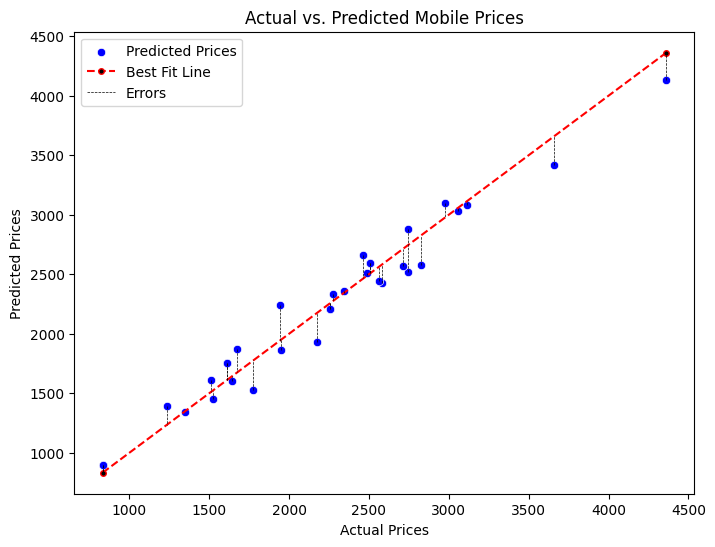

In [35]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=Y_pred, label='Predicted Prices', color='blue')

# Set labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Mobile Prices")

# Add a diagonal line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',  marker='o', markersize=4, markerfacecolor='black', linestyle='--', label='Best Fit Line')

# Add vertical error lines
plt.vlines(x=y_test, ymin=Y_pred, ymax=y_test, color='k', linestyle='--', linewidth=0.5, label='Errors')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

# **Model Performance Discussion**
----------------------------

## **Scatter Plot Analysis:**
- Points close to the diagonal red line indicate accurate predictions.
- Deviations from the line show prediction errors.
- Observe if there's a pattern to the errors (e.g., consistent underestimation or overestimation at certain price points).

## **Discrepancies and Further Analysis:**
- If there are noticeable discrepancies between actual and predicted prices, especially in specific price ranges or for certain mobile phone features, investigate further.
- Explore potential reasons for the discrepancies, like:
    - **Missing features**: Are there important features that the model is not considering?
    - **Non-linear relationships**: Might more complex relationships between the features and price exist?
    - **Outliers**: Do outliers influence the predictions significantly?
    - **Data quality**: Are there inconsistencies or errors in the data?

## **Next Steps:**
- To better understand the discrepancies, perform a residual analysis to visualize the distribution of prediction errors.
- Conduct further feature engineering or consider different model types to improve the fit.
- Analyze the data for outliers and potential data quality issues.


5.2.e) What might be some potential improvements or additional steps you could take to enhance the model’s performance?


**1. Feature Engineering:** Enhancing the dataset by creating new features that may improve model performance.

**2. Outlier Handling:** Addressing extreme values that could skew the model's predictions.

**3. Model Selection:** Trying different algorithms to find the best fit for the data.

**4. Regularization:** Techniques to reduce overfitting by penalizing overly complex models.

**5. Cross-Validation:** Validating the model on different subsets of the data for better accuracy assessments.

**6. Hyperparameter Tuning:** Finding the best model settings for optimal performance.

**7. Data Quality:** Ensuring the data is clean, consistent, and complete for reliable results.

**8. Residual Analysis:** Checking the differences between predicted and actual values for patterns that might indicate model issues.

**9. More Data:** Increasing the dataset size to enhance training and improve predictions.

**10. Ensemble Methods**: Using multiple models to improve prediction accuracy by aggregating their outputs.

#**THANK YOU**